Using cuda device
Epoch 1, Loss: 0.4750751852989197
Epoch 2, Loss: 0.09144492447376251
Epoch 3, Loss: 0.027421334758400917
Epoch 4, Loss: 0.027406424283981323
Epoch 5, Loss: 0.12764157354831696
Epoch 6, Loss: 0.06746029853820801
Epoch 7, Loss: 0.04946756735444069
Epoch 8, Loss: 0.038012102246284485
Epoch 9, Loss: 0.040114402770996094
Epoch 10, Loss: 0.07232753187417984


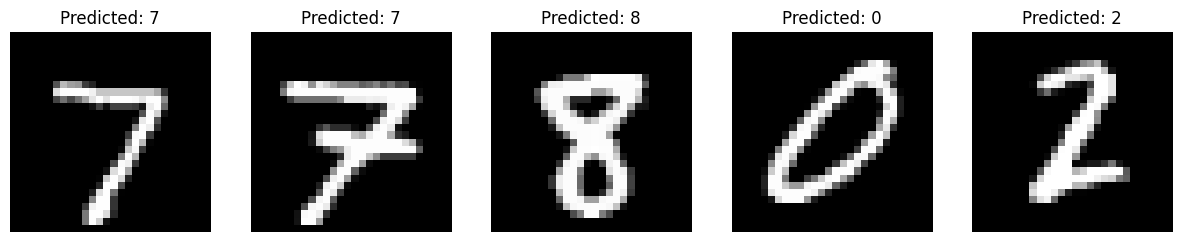

Accuracy of the model on the 10000 test images: 97.8125%


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np

# 数据加载与转换
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# 构建模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

# 检查 CUDA 是否可用，并将模型移到 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
for epoch in range(10):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# 评估模型
model.eval()
correct = 0
total = 0
images_to_show = 5
fig, ax = plt.subplots(1, images_to_show, figsize=(15, 3))

for batch_idx, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    # 显示测试图像和预测结果
    if batch_idx < images_to_show:
        ax[batch_idx].imshow(images[0].cpu().view(28, 28), cmap='gray')
        ax[batch_idx].set_title(f'Predicted: {predicted[0]}')
        ax[batch_idx].axis('off')

    if batch_idx >= images_to_show - 1:
        break

plt.show()
print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')
